In [21]:
#1 Import các thư viện cần thiết cho bài toán 
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [24]:
images=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
#2 Load dữ liệu mnist
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


In [13]:
print(X_train.shape)
#chia thành 2 tập train data và validation data
X_val, y_val = X_train[40000:50000], y_train[40000:50000]
X_train, y_train = X_train[:40000], y_train[:40000]
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [14]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
print(Y_train.shape)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  [6]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
#5 Định nghĩa model
model = Sequential()

#Thêm covolutional layer với 32 kernel . kích thước kernel 3*3
#dùng hàm sigmod làm activation và chỉ rõ input_shape cho layer đầu tiên 
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32,32,3)))

#thêm convolutional layer nữa
model.add(Conv2D(32,(3,3),activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))


In [16]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [17]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 94s 2ms/step - loss: 1.7793 - acc: 0.3485 - val_loss: 1.4097 - val_acc: 0.4932
Epoch 2/10
40000/40000 [==============================] - 87s 2ms/step - loss: 1.2112 - acc: 0.5702 - val_loss: 1.1544 - val_acc: 0.5958
Epoch 3/10
40000/40000 [==============================] - 90s 2ms/step - loss: 0.9853 - acc: 0.6535 - val_loss: 1.0646 - val_acc: 0.6312
Epoch 4/10
40000/40000 [==============================] - 79s 2ms/step - loss: 0.8339 - acc: 0.7109 - val_loss: 0.9808 - val_acc: 0.6589
Epoch 5/10
40000/40000 [==============================] - 82s 2ms/step - loss: 0.6985 - acc: 0.7612 - val_loss: 0.9943 - val_acc: 0.6635
Epoch 6/10
40000/40000 [==============================] - 85s 2ms/step - loss: 0.5684 - acc: 0.8119 - val_loss: 0.9680 - val_acc: 0.6698
Epoch 7/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.4456 - acc: 0.8580 - val_loss: 0.9863 - val_acc

In [19]:
score = model.evaluate(X_test,Y_test)
print(score)

10000/10000 [==============================] - 3s 272us/step
[1.2122885398864747, 0.6498]


Giá trị dự đoán:  dog


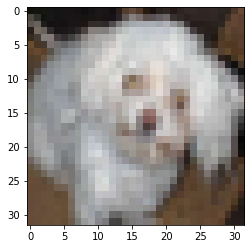

In [30]:
# 10. Dự đoán ảnh
plt.imshow(X_test[950])
y_predict = model.predict(X_test[950].reshape(1,32,32,3))
print('Giá trị dự đoán: ', images[np.argmax(y_predict)])